In [50]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [11]:
statistics = df.describe(include='all').transpose()

In [21]:
modes = df.mode().iloc[0]

In [22]:
statistics['mode'] = modes

In [23]:
statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,mode
satisfaction_level,14999.0,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0,0.1
last_evaluation,14999.0,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0,0.55
number_project,14999.0,NaN,NaN,NaN,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0,4.0
average_montly_hours,14999.0,NaN,NaN,NaN,201.050337,49.943099,96.0,156.0,200.0,245.0,310.0,135
time_spend_company,14999.0,NaN,NaN,NaN,3.498233,1.460136,2.0,3.0,3.0,4.0,10.0,3.0
Work_accident,14999.0,NaN,NaN,NaN,0.14461,0.351719,0.0,0.0,0.0,0.0,1.0,0.0
left,14999.0,NaN,NaN,NaN,0.238083,0.425924,0.0,0.0,0.0,0.0,1.0,0.0
promotion_last_5years,14999.0,NaN,NaN,NaN,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0,0.0
department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low


Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [25]:
correlation_matrix = df.corr()

<ipython-input-25-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


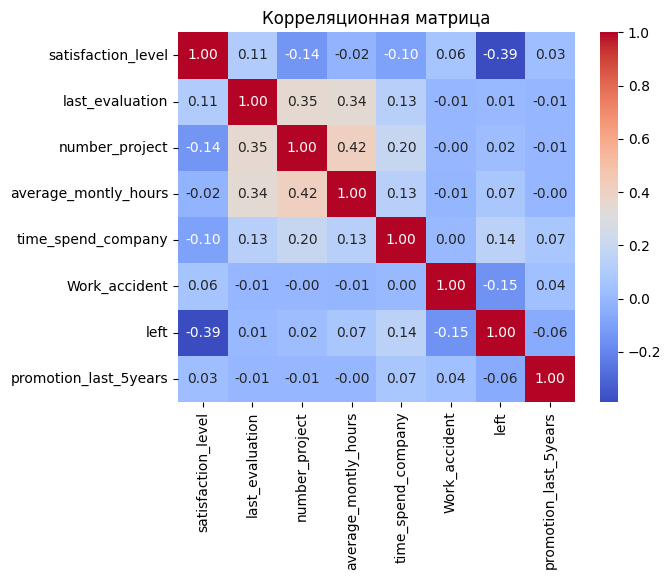

In [26]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

In [27]:
most_correlated = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
most_correlated_variables = most_correlated.head(2)
print("Две самые скоррелированные переменные:")
print(most_correlated_variables)

Две самые скоррелированные переменные:
satisfaction_level  satisfaction_level      1.000000
number_project      average_montly_hours    0.417211
dtype: float64


In [28]:
least_correlated_variables = most_correlated.tail(2)
print("\nДве наименее скоррелированные переменные:")
print(least_correlated_variables)


Две наименее скоррелированные переменные:
left  Work_accident        -0.154622
      satisfaction_level   -0.388375
dtype: float64


Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [29]:
employees_by_department = df['department'].value_counts()

In [30]:
print("Количество сотрудников в каждом департаменте:")
print(employees_by_department)

Количество сотрудников в каждом департаменте:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


Показать распределение сотрудников по зарплатам.

In [31]:
salary_distribution = df['salary'].value_counts()

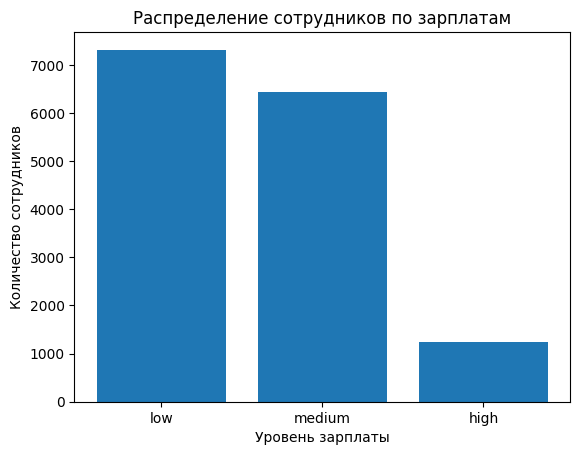

In [32]:
plt.bar(salary_distribution.index, salary_distribution)
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [33]:
salary_distribution_by_department = df.groupby(['department', 'salary']).size().unstack()

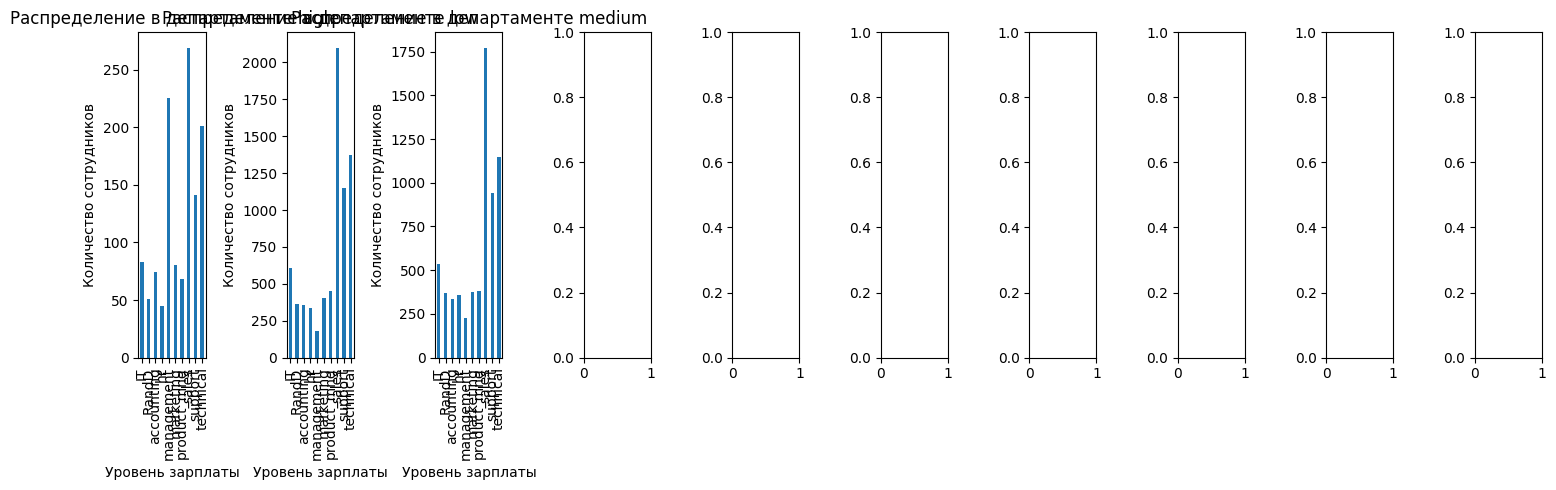

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=len(salary_distribution_by_department), figsize=(15, 5))
for i, (department, data) in enumerate(salary_distribution_by_department.items()):
    data.plot(kind='bar', ax=axes[i], title=f'Распределение в департаменте {department}')
    axes[i].set_xlabel('Уровень зарплаты')
    axes[i].set_ylabel('Количество сотрудников')

plt.tight_layout()
plt.show()


Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [41]:
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']

In [44]:
statistic, p_value = ttest_ind(low_salary_hours, high_salary_hours)

In [45]:
print(f"Статистика t: {statistic}")
print(f"p-значение: {p_value}")

Статистика t: 0.7288680398062308
p-значение: 0.4661023478267259


In [46]:
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница")
else:
    print("Не отвергаем нулевую гипотезу: статистически значимой разницы нет")

Не отвергаем нулевую гипотезу: статистически значимой разницы нет


Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
10
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [47]:
result = df.groupby('left').agg({
    'promotion_last_5years': 'mean',
    'satisfaction_level': 'mean',
    'number_project': 'mean'
}).reset_index()

In [48]:
result.columns = ['left', 'promotion_rate', 'avg_satisfaction', 'avg_projects']

In [49]:
print(result)

   left  promotion_rate  avg_satisfaction  avg_projects
0     0        0.026251          0.666810      3.786664
1     1        0.005321          0.440098      3.855503


Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [51]:
X = df.drop(['left', 'department', 'salary'], axis=1)
y = df['left']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [54]:
y_pred = lda.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [56]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000

